In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('../data/raw/q4_2024_data.csv')

In [11]:
# Scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])
df_scaled['symbol'] = df['symbol']

In [12]:
# log transform everything

cols = list(df_scaled.columns)
cols.pop(-1)

df_scaled.fillna(method='ffill', inplace=True)
df_log = np.log1p(df_scaled[cols] + 1e-6)
df_log.fillna(method='ffill', inplace=True)
df_log.fillna(method='bfill', inplace=True)

/var/folders/sz/y6mbyrnd7d1g13bfc3t_0q5c0000gn/T/ipykernel_1201/3220302035.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_scaled.fillna(method='ffill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/var/folders/sz/y6mbyrnd7d1g13bfc3t_0q5c0000gn/T/ipykernel_1201/3220302035.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_log.fillna(method='ffill', inplace=True)
/var/folders/sz/y6mbyrnd7d1g13bfc3t_0q5c0000gn/T/ipykernel_1201/3220302035.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_log.fillna(method='bfill', inplace=True)


In [13]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 40)
silhouette_scores = []
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[cols])
    score = silhouette_score(df_log[cols], cluster_labels)
    silhouette_scores.append(score)
    wcss_scores.append(kmeans.inertia_)

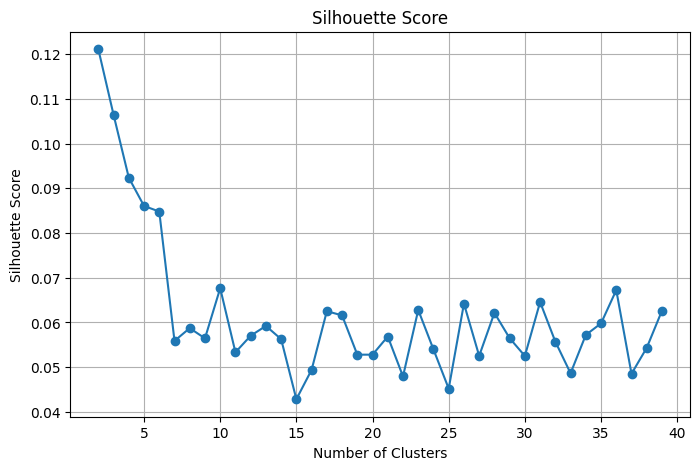

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
## USE this if you dont want the split 

from sklearn.cluster import KMeans

cluster_results = pd.DataFrame({'symbol': df['symbol']})

for k in range(5, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[cols])
    cluster_results[f'k={k}'] = cluster_labels

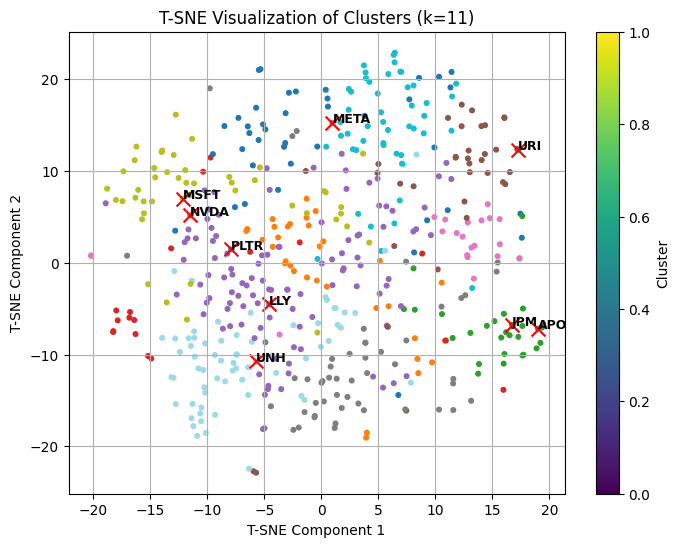

In [ ]:
from sklearn.manifold import TSNE

# Apply T-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_log[cols])

portfolio = ["MSFT", "JPM", "META", "NVDA", "LLY", 
             "DBRG", "UNH", "SVNDY", "SNOW", "ESEA", 
             "LGND", "APO", "SE", "URI", "PLTR"]

ticker = 'EL'

# Filter the dataframe to include only the portfolio stocks
df_filtered = df_scaled[df_scaled['symbol'].isin(portfolio)]
highlight_indices = df_filtered.index.to_list()
highlight_x = df_tsne[highlight_indices, 0]
highlight_y = df_tsne[highlight_indices, 1]

highlight_ticker = df_scaled[df_scaled['symbol'] == ticker].index
highlight_x_ticker = df_tsne[highlight_ticker, 0]
highlight_y_ticker = df_tsne[highlight_ticker, 1]

# Plot the T-SNE reduced data with clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=cluster_results['k=11'], cmap='tab20', s=11)

# Plot the highlighted stocks with 'X' markers
plt.scatter(highlight_x, highlight_y, color='red', marker='x', s=100, label='Highlighted Stocks')

# Add stock labels next to their 'X' markers
for i, stock in enumerate(df_filtered['symbol']):
    plt.text(highlight_x[i], highlight_y[i], stock, fontsize=9, fontweight='bold', color='black')

plt.title('T-SNE Visualization of Clusters (k=11)')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [8]:
newcols = df.columns[1:16]

from sklearn.metrics import silhouette_score

cluster_range = range(2, 40)
silhouette_scores = []
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[newcols])
    score = silhouette_score(df_log[newcols], cluster_labels)
    silhouette_scores.append(score)
    wcss_scores.append(kmeans.inertia_)

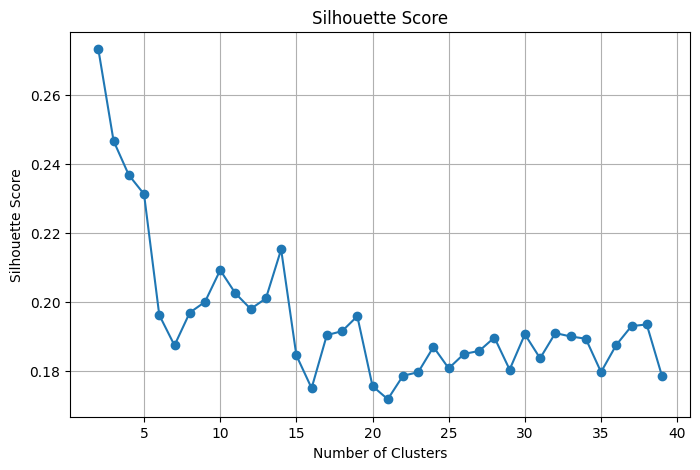

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [10]:
from sklearn.cluster import KMeans

new_cluster_results = pd.DataFrame({'symbol': df['symbol']})

for k in range(5, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[newcols])
    new_cluster_results[f'k={k}'] = cluster_labels

In [31]:
# GMM

from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture(n_components=9, random_state=42)
df_log['gmm'] = gmm.fit_predict(df_log[newcols])

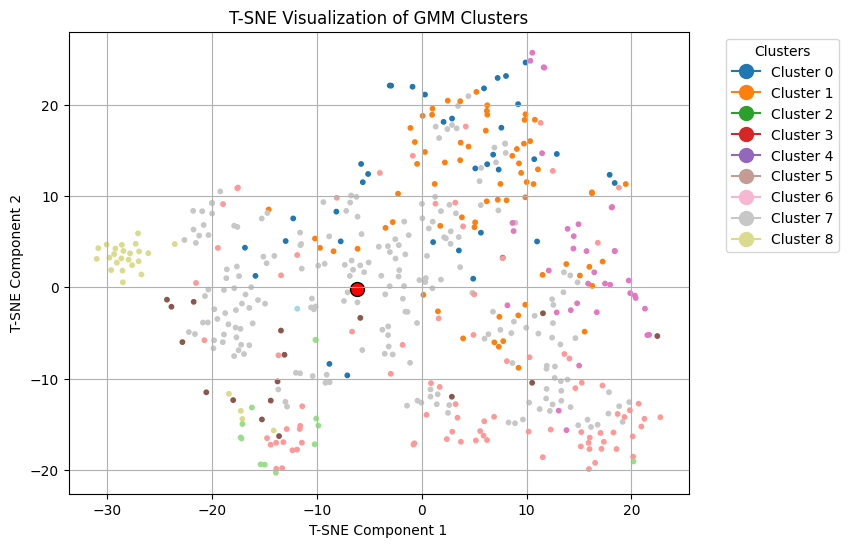

PYPL is in GMM cluster 6


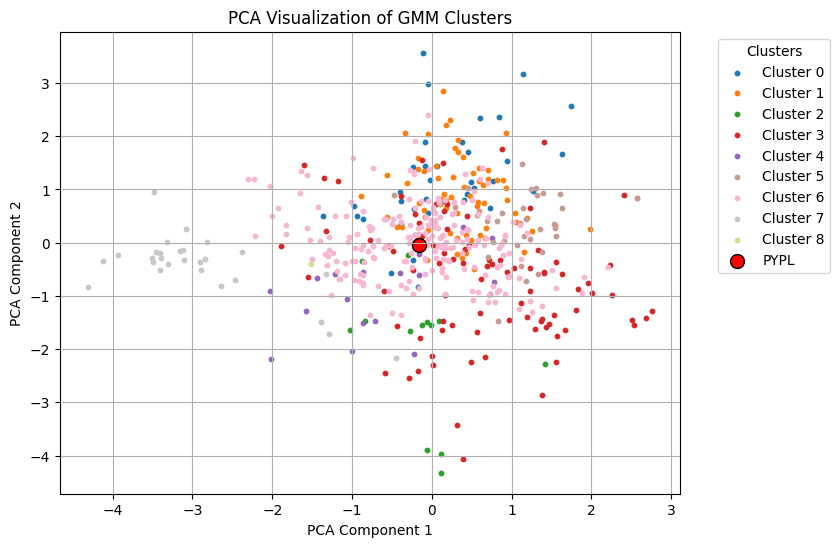

In [37]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_log[newcols])

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_log['gmm'], cmap='tab20', s=10)
plt.title('T-SNE Visualization of GMM Clusters')
# Highlight the position of PYPL on the T-SNE plot
pypl_index = df[df['symbol'] == 'PYPL'].index[0]
plt.scatter(df_tsne[pypl_index, 0], df_tsne[pypl_index, 1], color='red', s=100, label='PYPL', edgecolors='black')
# Create a custom legend with discrete cluster labels
unique_clusters = np.unique(df_log['gmm'])
# Update the legend to match the colors in the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.tab20(i / len(unique_clusters)), markersize=10, label=f'Cluster {i}') for i in unique_clusters]
plt.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.grid(True)
plt.show()


# Find the cluster number for PYPL in the GMM clusters
pypl_cluster = df_log.loc[pypl_index, 'gmm']
print(f"PYPL is in GMM cluster {pypl_cluster}")

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_log[newcols])

plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    cluster_points = df_pca[df_log['gmm'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=cluster_colors[cluster], label=f'Cluster {cluster}', s=10)

# Highlight PYPL
plt.scatter(df_pca[pypl_index, 0], df_pca[pypl_index, 1], color='red', s=100, label='PYPL', edgecolors='black')

plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of GMM Clusters')
plt.grid(True)
plt.show()

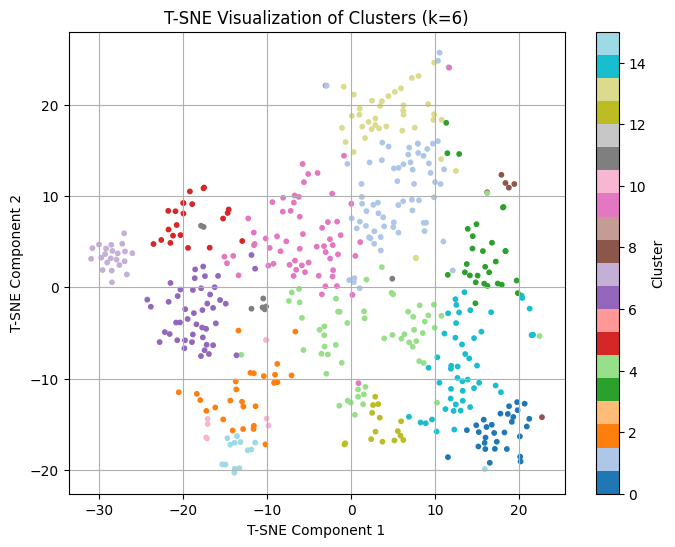

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_log[cols])

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=new_cluster_results['k=16'], cmap='tab20', s=10)
plt.title('T-SNE Visualization of Clusters (k=6)')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [12]:
clusters_k6 = {}
for cluster_id in range(6):
    clusters_k6[cluster_id] = new_cluster_results.loc[new_cluster_results['k=6'] == cluster_id, 'symbol'].tolist()

for cluster_id, stocks in clusters_k6.items():
    print(f"Cluster {cluster_id}: {stocks}")

Cluster 0: ['LII', 'TPL', 'ERIE', 'PLTR', 'DECK', 'SMCI', 'UBER', 'LULU', 'ABNB', 'PANW', 'AXON', 'FICO', 'PODD', 'FDS', 'MPWR', 'TSLA', 'TER', 'WST', 'ODFL', 'NOW', 'MKTX', 'JKHY', 'FTNT', 'ROL', 'ANET', 'CPRT', 'MSCI', 'TTWO', 'CDNS', 'RMD', 'ANSS', 'IT', 'SNPS', 'IDXX', 'HWM', 'MTD', 'TDG', 'WTW', 'VRSK', 'AVGO', 'GOOGL', 'META', 'AME', 'VRTX', 'ZTS', 'GRMN', 'LRCX', 'MNST', 'EW', 'NFLX', 'V', 'BKNG', 'CRM', 'FAST', 'MA', 'ISRG', 'GOOG', 'VRSN', 'EL', 'PSA', 'WAT', 'NVDA', 'TXN', 'CTAS', 'A', 'QCOM', 'PAYX', 'MCO', 'YUM', 'KLAC', 'ADBE', 'AMAT', 'MSFT', 'ADSK', 'ORCL', 'ITW', 'DOV', 'AAPL', 'BF-B', 'LLY', 'MCD', 'ABT', 'CL', 'HSY', 'MO', 'MSI', 'PG']
Cluster 1: ['WDAY', 'GDDY', 'HUBB', 'VLTO', 'KVUE', 'GEHC', 'FSLR', 'TRGP', 'EQT', 'ON', 'NDSN', 'CEG', 'EPAM', 'MTCH', 'CRL', 'GNRC', 'NXPI', 'ENPH', 'TDY', 'DXCM', 'CARR', 'OTIS', 'PAYC', 'STE', 'ZBRA', 'WRB', 'LVS', 'NVR', 'IEX', 'TROW', 'TMUS', 'WAB', 'TFX', 'CE', 'KEYS', 'BR', 'NCLH', 'IQV', 'AOS', 'PKG', 'BKR', 'ALGN', 'EG', 'HLT'

In [13]:
clusters_k10 = {}
for cluster_id in range(10):
    clusters_k10[cluster_id] = cluster_results.loc[cluster_results['k=10'] == cluster_id, 'symbol'].tolist()

for cluster_id, stocks in clusters_k10.items():
    print(f"Cluster {cluster_id}: {stocks}")

Cluster 0: ['PCG', 'ON', 'VICI', 'DAY', 'CRL', 'NXPI', 'TMUS', 'MKTX', 'ATO', 'FANG', 'BR', 'CDNS', 'ANSS', 'ALB', 'FTV', 'DLR', 'EXR', 'WTW', 'CHD', 'MHK', 'TEL', 'VTR', 'IVZ', 'TSN', 'AFL', 'RF', 'MAR', 'BEN', 'EFX', 'AMGN', 'ADSK', 'K', 'NUE', 'BALL', 'ADP', 'AIG', 'AXP', 'IFF', 'CLX', 'EMR', 'CMS', 'PG', 'PPG']
Cluster 1: ['DELL', 'SW', 'CRWD', 'KVUE', 'STLD', 'EQT', 'CSGP', 'WBD', 'MOH', 'NDSN', 'CEG', 'EPAM', 'TECH', 'MRNA', 'POOL', 'CARR', 'TROW', 'AMCR', 'DD', 'DOW', 'TFX', 'CE', 'LW', 'KEYS', 'HII', 'NCLH', 'IQV', 'INCY', 'COO', 'LNT', 'LKQ', 'CNC', 'HOLX', 'JBHT', 'HSIC', 'SWKS', 'RCL', 'TSCO', 'DAL', 'REGN', 'ABBV', 'LYB', 'STX', 'PSX', 'MOS', 'FCX', 'BRK-B', 'FMC', 'ES', 'WDC', 'WEC', 'LHX', 'CF', 'PM', 'MCHP', 'AKAM', 'CTSH', 'LH', 'VTRS', 'BIIB', 'GEN', 'VLO', 'DGX', 'UPS', 'COR', 'TXN', 'NI', 'PNW', 'DHR', 'FE', 'APA', 'AZO', 'PARA', 'MU', 'LUV', 'UNH', 'COST', 'NKE', 'AVY', 'RVTY', 'HAS', 'VZ', 'BF-B', 'SNA', 'FDX', 'PCAR', 'WBA', 'WY', 'TXT', 'INTC', 'HPQ', 'GPC', 'BDX

PYPL is in cluster 5

In [16]:
price = pd.read_csv('../data/sp_price_data.csv')

In [17]:
# calculate PYPL correlation with cluster

cluster_correlations = {}

for cluster_id, stocks in clusters_k10.items():
    cluster_prices = price[price['symbol'].isin(stocks)]
    pivot_prices = cluster_prices.pivot(index='date', columns='symbol', values='close')
    correlation_matrix = pivot_prices.corr()
    cluster_correlations[cluster_id] = correlation_matrix

print(f"PYPL correlation with cluster {cluster_correlations[5]['PYPL'].mean()}")

KeyError: 'PYPL'

In [ ]:
grouped_close = price.groupby('symbol')['close'].apply(list)
correlation_matrix = grouped_close.apply(pd.Series).transpose().corr()
print(f"PYPL mean correlation with SP {correlation_matrix['PYPL'].mean()}")

PYPL mean correlation with SP -0.025088748210791104


Plot stocks in cluster

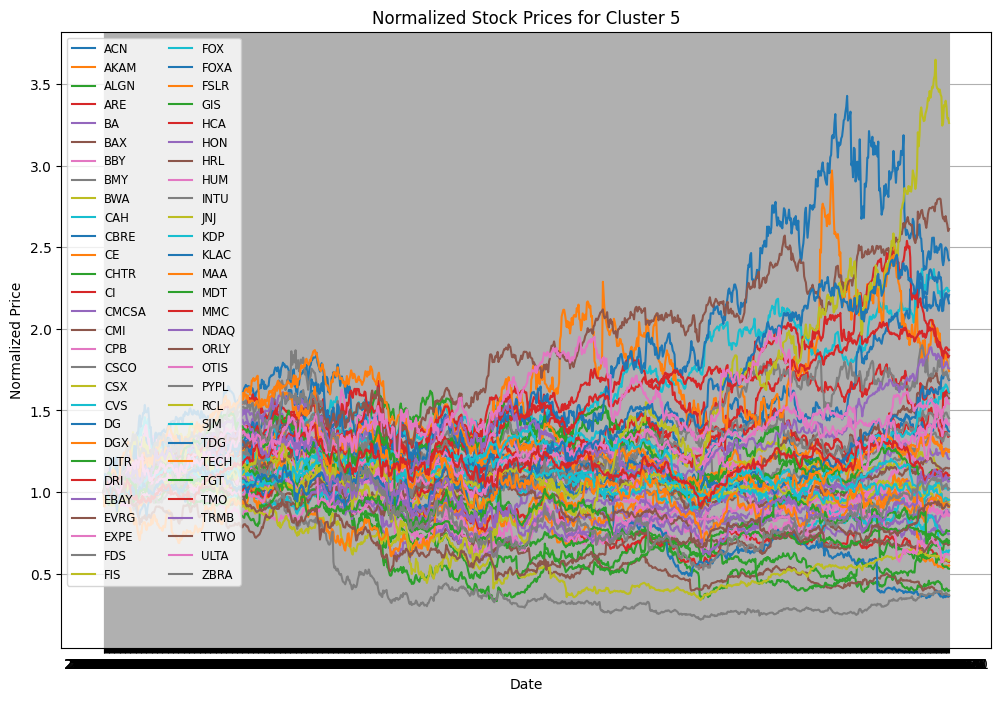

In [100]:
import matplotlib.pyplot as plt

# Get the list of stocks in cluster 5
cluster_5_stocks = clusters_k10[5]

# Filter the price data for the stocks in cluster 5
cluster_5_prices = price[price['symbol'].isin(cluster_5_stocks)]

# Pivot the data to have dates as index and symbols as columns
pivot_cluster_5_prices = cluster_5_prices.pivot(index='date', columns='symbol', values='close')

# Normalize the prices by dividing each stock's price by its initial price
normalized_prices = pivot_cluster_5_prices / pivot_cluster_5_prices.iloc[0]

# Plot the normalized prices
plt.figure(figsize=(12, 8))
for stock in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[stock], label=stock)

plt.title('Normalized Stock Prices for Cluster 5')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

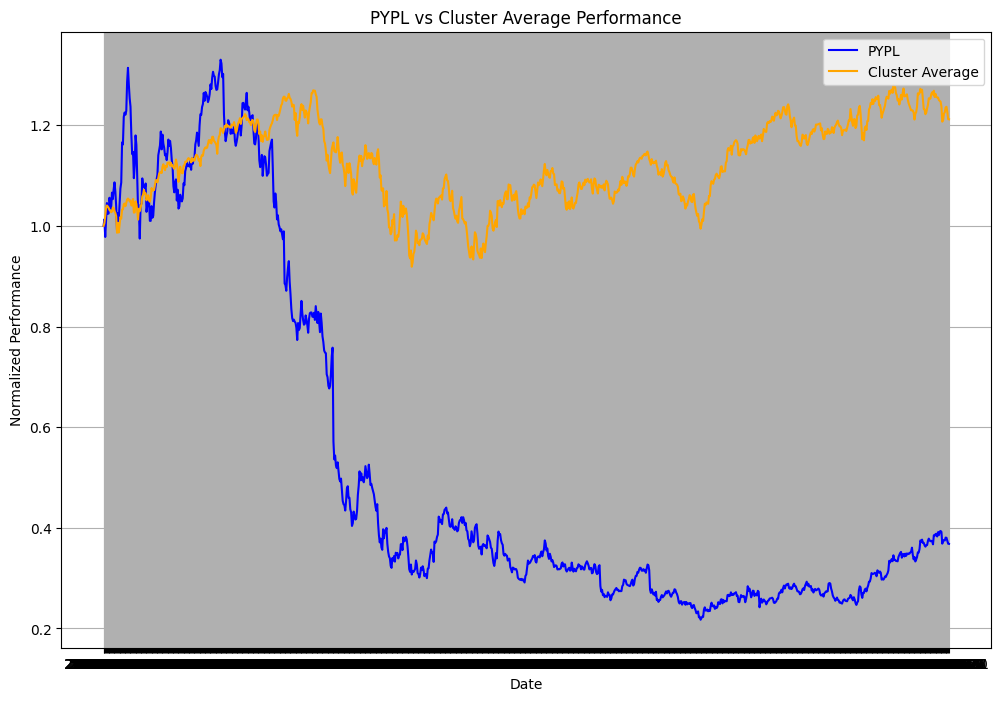

In [101]:
# Filter the price data for PYPL and its cluster stocks
pypl_cluster_prices = pivot_cluster_5_prices[pypl_cluster]

# Calculate the average performance of the cluster
average_cluster_performance = pypl_cluster_prices.mean(axis=1)

# Normalize PYPL's performance and the cluster's average performance
pypl_normalized = pypl_cluster_prices['PYPL'] / pypl_cluster_prices['PYPL'].iloc[0]
average_cluster_normalized = average_cluster_performance / average_cluster_performance.iloc[0]

# Plot the normalized performance
plt.figure(figsize=(12, 8))
plt.plot(pypl_normalized.index, pypl_normalized, label='PYPL', color='blue')
plt.plot(average_cluster_normalized.index, average_cluster_normalized, label='Cluster Average', color='orange')

plt.title('PYPL vs Cluster Average Performance')
plt.xlabel('Date')
plt.ylabel('Normalized Performance')
plt.legend()
plt.grid(True)
plt.show()

PYPL seems less correlated with the cluster than other stocks

In [103]:
# calculate PYPL correlation with cluster

cluster_correlations[5]['PYPL'].mean()

0.17460715705858407

In [ ]:
stock_cluster_corrs = {}
for symbol in cluster_correlations[5]:
    stock_cluster_corrs[symbol] = cluster_correlations[5][symbol].mean()

In [112]:
np.mean(list(stock_cluster_corrs.values()))

0.12038462984807961

It actually has a higher than average correlation with the cluster

Analyze for k=6 (including slope data)

In [114]:
# calculate PYPL correlation with cluster

cluster_correlations = {}

for cluster_id, stocks in clusters_k6.items():
    cluster_prices = price[price['symbol'].isin(stocks)]
    pivot_prices = cluster_prices.pivot(index='date', columns='symbol', values='close')
    correlation_matrix = pivot_prices.corr()
    cluster_correlations[cluster_id] = correlation_matrix

print(f"PYPL correlation with cluster {cluster_correlations[1]['PYPL'].mean()}")

PYPL correlation with cluster -0.03695596178258152
